In [7]:
%pip install torchsummary
%pip install tabulate
%pip install squarify
%pip install --upgrade squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torchvision.datasets as datasets
from torchsummary import summary
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np
import squarify
from matplotlib import cm

In [2]:
print(torch.backends.cudnn.version())  # Check the cuDNN version
print(torch.cuda.is_available())       # Check if CUDA is available
print(torch.cuda.device_count())       # Get the number of GPUs available
print(torch.cuda.current_device())     # Get the current GPU device ID
print(torch.cuda.get_device_name(0)) 

8902
True
1
0
NVIDIA RTX A2000 12GB


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [36]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a uniform size
    transforms.ToTensor(),  # Convert the PIL image to a PyTorch tensor
    transforms.RandomErasing(p=0.5),  # Apply RandomErasing
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize with ImageNet stats
])

In [37]:
transforms

<module 'torchvision.transforms' from '/home/idrone2/.local/lib/python3.11/site-packages/torchvision/transforms/__init__.py'>

In [38]:
# import torchvision.datasets as datasets
# import matplotlib.pyplot as plt

# def create_pie_chart(class_counts, class_names):
 
#     labels, counts = zip(*class_counts)
#     mapped_labels = [class_names[label] for label in labels]  # Map numerical labels to class names

#     plt.figure(figsize=(8, 8))
#     plt.pie(counts, labels=mapped_labels, autopct='%1.1f%%', startangle=140, colors=['red', 'green', 'yellow'])
#     #plt.title('Dataset Composition')
#     plt.axis('equal')
#     plt.show()

# def get_dataset_composition_pytorch(dataset):
  
#     class_counts = {}
#     for image, label in dataset:
#         if label not in class_counts:
#             class_counts[label] = 0
#         class_counts[label] += 1
#     return [(label, count) for label, count in class_counts.items()]

# # Example usage:
# dataset = datasets.ImageFolder('/home/idrone2/Desktop/alzheimer')
# class_counts = get_dataset_composition_pytorch(dataset)
# class_names = dataset.classes
# create_pie_chart(class_counts, class_names)
# def create_treemap(class_counts, class_names):
#     """Creates a treemap to visualize the dataset composition.

#     Args:
#         class_counts (list): List of tuples containing class labels and their corresponding sample counts.
#         class_names (list): List of class names.
#     """
#     # Extract counts from tuples
#     counts = [count for _, count in class_counts]
    
#     # Manually define a color palette
#     colors = plt.cm.tab20(np.linspace(0, 1, len(class_names)))  # Use 'tab20' colormap

#     # Create the treemap
#     plt.figure(figsize=(10, 6))
#     squarify.plot(sizes=counts, label=class_names, alpha=0.8, color=colors)
#     plt.title('Dataset Composition (Treemap)')
#     plt.axis('off')  # Turn off the axis for better appearance
#     plt.show()

# def create_histogram(class_counts, class_names):
#     """Creates a histogram to visualize the dataset composition.

#     Args:
#         class_counts (list): List of tuples containing class labels and their corresponding sample counts.
#         class_names (list): List of class names.
#     """
#     # Extract counts from tuples
#     counts = [count for _, count in class_counts]

#     # Create the histogram
#     plt.figure(figsize=(10, 6))
#     plt.bar(class_names, counts, color='skyblue')
#     plt.xlabel('Class Names')
#     plt.ylabel('Number of Samples')
#     plt.title('Dataset Composition (Histogram)')
#     plt.xticks(rotation=45, ha='right')  # Rotate the class names for better readability
#     plt.tight_layout()
#     plt.show()

# def get_dataset_composition(dataset):
#     """Gets the class composition from the dataset.

#     Args:
#         dataset (ImageFolder): Dataset from which to get class composition.

#     Returns:
#         list: List of tuples with class names and their sample counts.
#     """
#     class_counts = {}
#     for _, label in dataset:
#         class_name = dataset.classes[label]  # Assuming dataset.classes provides integer labels
#         if class_name not in class_counts:
#             class_counts[class_name] = 0
#         class_counts[class_name] += 1
#     return list(class_counts.items())

# # Example usage:
# dataset = datasets.ImageFolder('/home/idrone2/Desktop/enchanced_chest_xray')
# class_counts = get_dataset_composition(dataset)
# class_names = dataset.classes

# # Create Treemap
# create_treemap(class_counts, class_names)

# # Create Histogram
# create_histogram(class_counts, class_names)


# dataset = ImageFolder(root='/home/idrone2/Desktop/rk/chest_xray', transform=transform)
# dataset

In [39]:
dataset = datasets.ImageFolder(root='/home/idrone2/Desktop/rk/chest_xray', transform=transform)
test_size = int(0.1 * len(dataset))
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size - test_size

In [40]:
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [41]:
# # Get the lengths of the datasets
# train_len = len(train_dataset)
# test_len = len(val_size)

# # Create a bar chart
# plt.bar(['Train', 'Test'], [train_len, test_len])
# plt.xlabel('Dataset')
# plt.ylabel('Number of Samples')
# plt.title('Data Split Visualization')
# plt.show()

# print('dataset', dataset)
# print('train_size', train_size)
# print('test_size', val_size)
# print('train_dataset', train_dataset)
# print('test_dataset', val_size)


In [42]:
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [43]:
# # DataLoaders with num_workers and pin_memory
# train_loaders = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
# test_loaders = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)
# val_loaders = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

In [44]:
# CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.maxpool1 = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.maxpool2 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.maxpool3 = nn.MaxPool2d(2, 2)

        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.maxpool4 = nn.MaxPool2d(2, 2)

        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))

        self.fc1 = nn.Linear(512, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, len(dataset.classes))
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.maxpool1(F.relu(self.bn1(self.conv1(x))))
        x = self.maxpool2(F.relu(self.bn2(self.conv2(x))))
        x = self.maxpool3(F.relu(self.bn3(self.conv3(x))))
        x = self.maxpool4(F.relu(self.bn4(self.conv4(x))))
        
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

# Instantiate the model, optimizer, loss function, and scheduler
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.00001)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)

In [45]:


def print_model_summary_table(model):
    """Prints a table summary of the model architecture and number of parameters."""
    total_params = 0
    layer_info = []
    for name, param in model.named_parameters():
        if param.requires_grad:
            num_params = param.numel()
            total_params += num_params
            layer_info.append([name, num_params])
    
    # Create a table header
    headers = ["Layer Name", "Number of Parameters"]
    
    # Create the table data
    table_data = layer_info + [["Total", total_params]]
    
    # Print the table
    print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))

print_model_summary_table(model)

╒══════════════╤════════════════════════╕
│ Layer Name   │   Number of Parameters │
╞══════════════╪════════════════════════╡
│ conv1.weight │                   1728 │
├──────────────┼────────────────────────┤
│ conv1.bias   │                     64 │
├──────────────┼────────────────────────┤
│ bn1.weight   │                     64 │
├──────────────┼────────────────────────┤
│ bn1.bias     │                     64 │
├──────────────┼────────────────────────┤
│ conv2.weight │                  73728 │
├──────────────┼────────────────────────┤
│ conv2.bias   │                    128 │
├──────────────┼────────────────────────┤
│ bn2.weight   │                    128 │
├──────────────┼────────────────────────┤
│ bn2.bias     │                    128 │
├──────────────┼────────────────────────┤
│ conv3.weight │                 294912 │
├──────────────┼────────────────────────┤
│ conv3.bias   │                    256 │
├──────────────┼────────────────────────┤
│ bn3.weight   │                  

In [46]:
print(model)

CNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=

In [48]:
def train(model, train_loader, val_loader, optimizer, criterion, scheduler, device, epochs=25):
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []

    # Loop for each epoch
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs} started")
        
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for i, (inputs, labels) in enumerate(train_loader):
            # Send data to the GPU if available
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            
            # Calculate training accuracy
            _, preds = torch.max(outputs, 1)
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        train_acc = correct_train / total_train
        train_loss = running_loss / len(train_loader)
        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                # Calculate validation accuracy
                _, preds = torch.max(outputs, 1)
                correct_val += (preds == labels).sum().item()
                total_val += labels.size(0)

        val_acc = correct_val / total_val
        val_loss = val_loss / len(val_loader)
        val_loss_list.append(val_loss)
        val_acc_list.append(val_acc)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

        # Scheduler step
        scheduler.step(val_loss)

    return train_loss_list, val_loss_list, train_acc_list, val_acc_list

# Assuming your model, dataloaders, optimizer, criterion, scheduler are defined:
train_loss, val_loss, train_acc, val_acc = train(
    model, train_loader, val_loader, optimizer, criterion, scheduler, device, epochs=50
)


Epoch 1/50 started
Epoch 1/50, Train Loss: 0.5256, Val Loss: 0.5790, Train Acc: 0.7822, Val Acc: 0.7717
Epoch 2/50 started
Epoch 2/50, Train Loss: 0.5231, Val Loss: 0.5304, Train Acc: 0.7871, Val Acc: 0.7922
Epoch 3/50 started
Epoch 3/50, Train Loss: 0.5222, Val Loss: 0.5482, Train Acc: 0.7861, Val Acc: 0.7905
Epoch 4/50 started
Epoch 4/50, Train Loss: 0.5185, Val Loss: 0.4950, Train Acc: 0.7916, Val Acc: 0.7956
Epoch 5/50 started
Epoch 5/50, Train Loss: 0.5226, Val Loss: 0.5407, Train Acc: 0.7874, Val Acc: 0.7973
Epoch 6/50 started
Epoch 6/50, Train Loss: 0.5129, Val Loss: 0.5552, Train Acc: 0.7891, Val Acc: 0.7853
Epoch 7/50 started
Epoch 7/50, Train Loss: 0.5092, Val Loss: 0.4902, Train Acc: 0.7946, Val Acc: 0.8007
Epoch 8/50 started
Epoch 8/50, Train Loss: 0.5098, Val Loss: 0.5226, Train Acc: 0.7950, Val Acc: 0.7853
Epoch 9/50 started
Epoch 9/50, Train Loss: 0.5120, Val Loss: 0.5445, Train Acc: 0.7897, Val Acc: 0.7785
Epoch 10/50 started
Epoch 10/50, Train Loss: 0.5081, Val Loss: 0

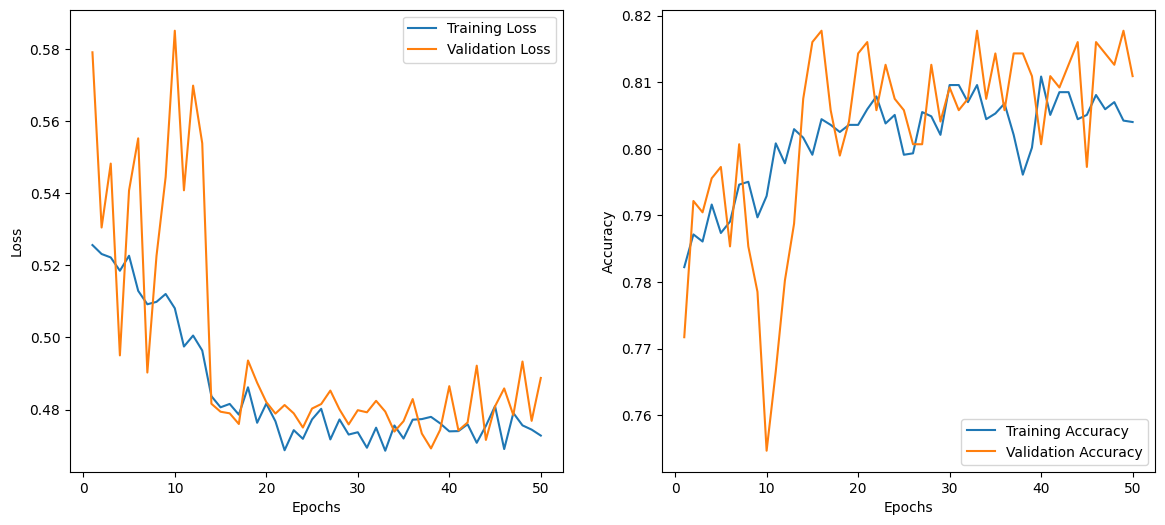

In [50]:
# Plotting training and validation loss and accuracy
epochs_range = range(1, len(train_loss) + 1)

plt.figure(figsize=(14, 6))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [51]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize

In [57]:
def evaluate_model(model, val_loader, device, num_classes):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            probs = torch.softmax(outputs, dim=1)  # For ROC curve and AUC
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)
    all_probs = np.array(all_probs)

    # Classification report
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Calculate Sensitivity (Recall)
    recall = np.diag(cm) / np.sum(cm, axis=1)
    print(f"Sensitivity (Recall) for each class: {recall}")

    # ROC and AUC
    if num_classes == 2:  # Binary classification
        fpr, tpr, thresholds = roc_curve(all_labels, all_probs[:, 1])
        roc_auc_score = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()

        print(f"AUC: {roc_auc_score:.2f}")
    else:  # Multiclass ROC
        fpr = dict()
        tpr = dict()
        roc_auc_scores = dict()
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(all_labels == i, all_probs[:, i])
            roc_auc_scores[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve for each class
        plt.figure()
        colors = ['aqua', 'darkorange', 'cornflowerblue']
        for i, color in zip(range(num_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label=f'ROC curve of class {i} (area = {roc_auc_scores[i]:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()

        for i in range(num_classes):
            print(f"AUC for class {i}: {roc_auc_scores[i]:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       281
           1       0.93      0.95      0.94       146
           2       0.74      0.53      0.61       160

    accuracy                           0.80       587
   macro avg       0.81      0.79      0.79       587
weighted avg       0.80      0.80      0.80       587



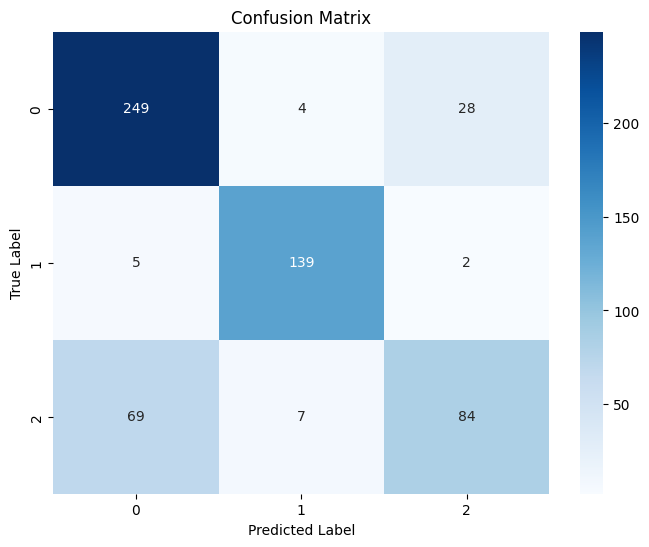

Sensitivity (Recall) for each class: [0.886121   0.95205479 0.525     ]


TypeError: 'numpy.float64' object is not callable

In [58]:
# Assuming your model and validation loader are defined
evaluate_model(model, val_loader, device, num_classes=3)  # Replace num_classes with the correct number of classes
